## Mount drive into colab

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


# Nonlinear Optimization Final Project

In [80]:
# import packages 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mlp 
import os 


# 0. Data Preparation

## 0.1 Load Data into numpy array 

In [81]:
def load_data(FNAME: str="inliers",
              dsize: str="normal") -> np.ndarray:
  """ 
  Function that loads txt data into numpy.ndarray format
  
  Argument: 
      FNAME (str) : file name of the data (txt file)
  
  Returns: 
      measurement_data : numpy array (matrix) of measurements (489 x 18) 
  """
  CUR_DIR = os.getcwd() 
  # DIR_NAME = "drive/MyDrive/NLO_final/data"
  DIR_NAME = "./data"
  FILE_NAME = FNAME + ".txt"
  DATA_DIR = os.path.join(CUR_DIR, DIR_NAME, FILE_NAME)
  measurement_data = np.loadtxt(DATA_DIR, dtype=np.float64, delimiter=' ')
  if dsize=='small':
    # for testing less step size
    measurement_data = measurement_data[:100]
  return measurement_data

robust = False 
data_name = "outliers" if robust else "inliers" 

measurement_data = load_data(data_name, ) 

print("shape of Data of sensor 1: ", measurement_data[:, :3].shape) 
print("Measurement data of sensor 1: \n", measurement_data[:, :3]) 

shape of Data of sensor 1:  (489, 3)
Measurement data of sensor 1: 
 [[-22.  28. -86.]
 [-24.  25. -82.]
 [-27.  21. -79.]
 ...
 [ 45.  15.  -6.]
 [ 42.  22.  -1.]
 [ 44.  27.   0.]]


## 0.2 Visualization methods

In [82]:
M = measurement_data 

def visualize_measurement(M: np.ndarray, outliers=False):
  """
  Function that visualized each magnetometers measurement in 3D plot 

  input: measurement_data 
  return: (fig, axs) 
  """
  m_by_mag = [M[:, (3*i):(3*(i+1))] for i in range(6)]
  fig = plt.figure(figsize=(15, 12))
  # fig.suptitle("Measurements by each Magnetometer", fontsize=20)
  axs = []
  ticks = [-100, -50, 0, 50, 100]
  for i in range(6): 
    r, c = i // 3, i % 3
    ax = fig.add_subplot(2, 3, i+1, projection='3d')
    ax.set_title(f"Magnetometer {i+1}", fontsize=15)
    ax.plot3D(xs=m_by_mag[i][:, 0], ys=m_by_mag[i][:, 1], zs=m_by_mag[i][:, 2], linestyle=' ', marker='o', alpha=0.4, label='measurement')
    ax.set_xlim3d([-100, 100]); ax.set_ylim3d([-100, 100]); ax.set_zlim3d([-100, 100])
    ax.set_xticks(ticks); ax.set_yticks(ticks); ax.set_zticks(ticks)
    ax.set_xlabel('x', fontsize=15); ax.set_ylabel('y', fontsize=15); ax.set_zlabel('z', fontsize=15)
    axs.append(ax)
  return (fig, axs)


def visualize_measurement(M: np.ndarray, outliers=False):
  """
  Function that visualized each magnetometers measurement in 3D plot 

  input: measurement_data 
  return: (fig, axs) 
  """
  m_by_mag = [M[:, (3*i):(3*(i+1))] for i in range(6)]
  fig = plt.figure(figsize=(15, 12))
  # fig.suptitle("Measurements by each Magnetometer", fontsize=20)
  axs = []
  ticks = [-100, -50, 0, 50, 100]
  for i in range(6): 
    r, c = i // 3, i % 3
    ax = fig.add_subplot(2, 3, i+1, projection='3d')
    ax.set_title(f"Magnetometer {i+1}", fontsize=15)
    ax.plot3D(xs=m_by_mag[i][:, 0], ys=m_by_mag[i][:, 1], zs=m_by_mag[i][:, 2], linestyle=' ', marker='o', alpha=0.4, label='measurement')
    ax.set_xlim3d([-100, 100]); ax.set_ylim3d([-100, 100]); ax.set_zlim3d([-100, 100])
    ax.set_xticks(ticks); ax.set_yticks(ticks); ax.set_zticks(ticks)
    ax.set_xlabel('x', fontsize=15); ax.set_ylabel('y', fontsize=15); ax.set_zlabel('z', fontsize=15)
    axs.append(ax)
  return (fig, axs)

def visualize_estimates(M: np.ndarray, X:np.ndarray):
  """
  Function that visualized each magnetometers measurement and its estimates in 3D plot 

  input: measurement_data 
  return: (fig, axs) 
  """
  m_by_mag = [M[:, (3*i):(3*(i+1))] for i in range(6)]
  fig = plt.figure(figsize=(15, 12))
  # fig.suptitle("Measurements by each Magnetometer", fontsize=20)
  axs = []
  ticks = [-100, -50, 0, 50, 100]
  for i in range(6): 
    r, c = i // 3, i % 3
    ax = fig.add_subplot(2, 3, i+1, projection='3d')
    ax.set_title(f"Magnetometer {i+1}", fontsize=15)
    ax.plot3D(xs=m_by_mag[i][:, 0], ys=m_by_mag[i][:, 1], zs=m_by_mag[i][:, 2], linestyle='-', c='b', marker='o', alpha=0.4, label='measurement')
    ax.plot3D(xs=X[i][:, 0], ys=X[i][:, 1], zs=X[i][:, 2], linestyle=' ', marker='^', c='r', alpha=0.4, label='estimation')
    ax.plot3D([0], [0], [0], linestyle=' ', marker='x', c='k', label='origin') 
    ax.set_xlabel('x', fontsize=15); ax.set_ylabel('y', fontsize=15); ax.set_zlabel('z', fontsize=15)
    ax.legend()
    axs.append(ax)
  return (fig, axs)

def visualize_estimates_only(X_updated:np.ndarray,  X_initial: np.ndarray):
  """
  Function that visualized each magnetometers initial estimates and its updated estimates in 3D plot 

  input: measurement_data 
  return: (fig, axs) 
  """

  fig = plt.figure(figsize=(15, 12))
  # fig.suptitle("Measurements by each Magnetometer", fontsize=20)
  axs = []
  ticks = [-2, -1, 0, 1, 2]
  for i in range(6): 
    r, c = i // 3, i % 3
    ax = fig.add_subplot(2, 3, i+1, projection='3d')
    ax.set_title(f"Magnetometer {i+1}", fontsize=15)
    ax.plot3D(xs=X_initial[i][:, 0], ys=X_initial[i][:, 1], zs=X_initial[i][:, 2], linestyle='-', c='b', marker='>', alpha=0.4, label='initial')
    ax.plot3D(xs=X_updated[i][:, 0], ys=X_updated[i][:, 1], zs=X_updated[i][:, 2], linestyle='-', c='r', marker='^', alpha=0.4, label='updated')
    ax.plot3D([0], [0], [0], linestyle=' ', marker='x', c='k', label='origin') 
    ax.set_xlabel('x', fontsize=15); ax.set_ylabel('y', fontsize=15); ax.set_zlabel('z', fontsize=15)
    ax.legend()
    axs.append(ax)
  return (fig, axs)


def loss_figure(losses):
  """
  Function that visualized each magnetometers loss by update step 

  input: measurement_data 
  return: (fig, axs) 
  """

  fig = plt.figure(figsize=(16, 8))
  # fig.suptitle("Measurements by each Magnetometer", fontsize=20)
  axs = []
  for loss in losses: 
    i = 0    
    ax = fig.add_subplot(2, 3, i+1)
    ax.set_title(f"Magnetometer {i+1}", fontsize=15)
    ax.semilogy(loss, label='cost')
    ax.set_xlabel('step', fontsize=15); ax.set_ylabel('cost', fontsize=15)
    ax.legend(); ax.grid();
    axs.append(ax)
    i += 1
  return (fig, axs)


In [83]:
Ks = [np.array([[1, 1, 1], [0, 1, 1], [0, 0, 1]]) for i in range(6)]
bs = [np.array(np.zeros((3, 1))) for i in range(6)]
xs = [np.random.randn(3, len(M)) for i in range(6)]
ms = [M[:, (3*i):(3*(i+1))] for i in range(6)]

xs_initial_plot = [x.T / np.linalg.norm(x.T, axis=1).reshape(-1, 1) for x in xs]

In [84]:
# rs = [] 
# for i, xi in enumerate(x.T):
#   yi = (1 / np.linalg.norm(xi)) * np.matmul(K, xi.reshape(-1, 1)) + b 
#   ri = yi - m[i].reshape(-1, 1)
#   rs.append(ri) 

# res_vec = np.vstack(rs) 
# print(res_vec)

def residual_vector(K, x, b, m):
  rs = [] 
  for i, xi in enumerate(x.T):
    xi = xi.reshape(-1, 1)  # reshape to column vector
    yi = (1/ np.linalg.norm(xi)) * np.matmul(K, xi) + b 
    ri = yi - m[i].reshape(-1, 1) 
    rs.append(ri) 
  res_vec = np.vstack(rs) 
  return res_vec 

def loss(res_vec):
  return np.matmul(res_vec.T, res_vec)

def normed(vec):
  return vec / (np.linalg.norm(vec))

def jacobian_b(b):
  jbs = [] 
  for i in range(len(M)):
    jbi = np.eye(b.size)
    jbs.append(jbi) 
  return np.vstack(jbs)

def jacobian_x(x):
  jxs = [] 
  for i, xi in enumerate(x.T):
    xi = xi.reshape(-1, 1)
    # print(xi)
    jxi = np.eye(3) - np.matmul(xi, xi.T) / np.linalg.norm(xi)**2
    jxi = np.matmul(K, jxi)
    jxi /= np.linalg.norm(xi) 
    # print(jxi)
    jxi_span = [jxi * (i==j) for j in range(len(M))]
    jxi_span = np.vstack(jxi_span)
    # print(jxi_span)
    jxs.append(jxi_span) 
  jacobian_matrix = np.hstack(jxs)
  # plt.imshow(jacobian_matrix)
  return jacobian_matrix  

def jacobian_k(x):
  jks = [] 
  for i, xi in enumerate(x.T):
    xi = xi.reshape(-1, 1) 
    jki = np.kron(normed(xi).T, np.eye(3))
    jks.append(jki) 
  jac_k = np.vstack(jks)
  return jac_k

def jacobian(K, b, x):
  return np.hstack([jacobian_k(x), jacobian_b(b)])

def gradient(jacobian, residual):
  return 2 * np.matmul(jacobian.T, residual)

def hessian(jacobian, residual):
  return 2 * np.matmul(jacobian.T, jacobian)

def enforce_upper_triangular(dx):
  idx_lst = [1, 2, 5]
  enforce_zero = np.ones_like(dx)
  enforce_zero[idx_lst] = 0
  return dx * enforce_zero

def update_kb(theta):
  K_next = theta[:K.size].reshape(-3, 3).T 
  b_next = theta[K.size:K.size+b.size]
  return (K_next, b_next)

def vectorize_x(x):
  return x.T.flatten().reshape(-1, 1)

def restore_x(x_vec):
  return x_vec.reshape(-1, 3).T

def surrogate_model(dx, jacobian, residual):
  surrogate = np.linalg.norm(np.matmul(jacobian, dx) + residual) ** 2 
  penalty = (1/2) * np.linalg.norm(dx)**2
  return surrogate + penalty 

def model_quality(dx, res_vec, res_vec_new, jacobian):
  num = loss(res_vec_new)[0, 0] - loss(res_vec)[0, 0]
  denum = surrogate_model(dx, jacobian, res_vec) - surrogate_model(np.zeros_like(dx), jacobian, res_vec)
  return num / denum



In [85]:
from tqdm import tqdm


def LMA(K, b, x, m):
  theta = np.hstack([K, b])
  theta = theta.T.flatten()
  theta = theta.reshape(-1, 1)

  res_vec = residual_vector(K, x, b, m)

  loss_total = [loss(res_vec)[0, 0]]
  loss_prev = loss(res_vec)

  converged = False
  i = 0
  itt = 0 
  eta = 0 

  # Alternate optimization between [K, b] and x
  # print("Round", end='')
  while not converged: 
    # print(f"{i+1}", end='')
    # Joint Optimization of [K, b]
    loss_per_kb_iter = [loss(res_vec)[0, 0]]
    converged = False
    while not converged:
      jacobian_matrix = jacobian(K, b, x)
      grad = gradient(jacobian_matrix, res_vec) 
      hess = hessian(jacobian_matrix, res_vec) 

      # dx for Gauss-Newton
      dtheta = - np.linalg.inv(hess + 0.1 * np.eye(hess.shape[0])) @ grad
      dtheta = enforce_upper_triangular(dtheta) 
      theta = theta + dtheta
      K, b = update_kb(theta)
      res_vec_new = residual_vector(K, x, b, m) 
      loss_per_kb_iter.append(loss(res_vec_new)[0, 0])
      loss_total.append(loss(res_vec_new)[0, 0])

      func_tol = np.abs(loss(res_vec) - loss(res_vec_new))
      res_vec = res_vec_new 
      converged = func_tol < 1
      itt += 1 


    # Optimization of x 
    converged = False 
    loss_per_x_iter = [loss(res_vec)[0, 0]]
    while not converged:
      x_vec = vectorize_x(x)
      jacobian_matrix = jacobian_x(x)
      grad = gradient(jacobian_matrix, res_vec)
      hess = hessian(jacobian_matrix, res_vec)

      dx = -np.linalg.inv(hess + 0.1 * np.eye(hess.shape[0])) @ grad
      x_vec = x_vec + dx 
      x = restore_x(x_vec) 
      res_vec_new = residual_vector(K, x, b, m) 

      loss_per_x_iter.append(loss(res_vec_new)[0, 0])
      loss_total.append(loss(res_vec_new)[0, 0])

      func_tol = np.abs(loss(res_vec) - loss(res_vec_new))
      converged = func_tol < 1 
      # print(func_tol)
      res_vec = res_vec_new 
      itt += 1 
    
    loss_new = loss(res_vec_new)
    func_tol = np.abs(loss_prev - loss_new) 
    converged = func_tol < 2 
    loss_prev = loss_new 
    # print()
    # print("Round: ", i+1, "starting at loss: ", loss_prev[0, 0])
    # print(f"Total iteration number : {itt+1}")
    # print()
    i+=1 


  # plt.semilogy(loss_total)
  # plt.show()
  # print(loss_total[-1])

  return K, b, x, loss_total


losses = [] 
for i in tqdm(range(6)):
  print(f"\nCalibrating Sensor {i+1}")
  Ks[i], bs[i], xs[i], loss_total = LMA(Ks[i], bs[i], xs[i], ms[i])
  losses.append(loss_total)

  0%|          | 0/6 [00:00<?, ?it/s]


Calibrating Sensor 1


In [56]:
Ks_array = np.array(Ks)
bs_array = np.array(bs) 

for i in range(6): 
    save_dir = f"results/Magnetometor_{i+1}/"
    os.makedirs(save_dir, exist_ok=True)
    np.savetxt(save_dir + f"K{i+1}", Ks_array[i], delimiter=' ')
    np.savetxt(save_dir + f"b{i+1}", bs_array[i], delimiter=' ')
    np.savetxt(save_dir + f"x{i+1}", xs[i].T, delimiter=' ')
    

[[[58.17889445  0.24102608  0.26053086]
  [ 0.         59.0269652  -3.95812369]
  [ 0.          0.         59.79390566]]

 [[57.13528403 -0.98521177  1.08077792]
  [ 0.         56.88999612 -4.95215697]
  [ 0.          0.         58.56075052]]

 [[57.06240459  0.47217901  0.87311406]
  [ 0.         58.04749144 -0.307894  ]
  [ 0.          0.         59.6520399 ]]

 [[57.7751342   0.9636602  -0.14997536]
  [ 0.         58.13927979  0.49313728]
  [ 0.          0.         59.30205466]]

 [[57.12933135  1.13629653 -0.26959275]
  [ 0.         57.10564759 -2.34551203]
  [ 0.          0.         59.67395318]]

 [[57.65537743  0.43600618  0.12451204]
  [ 0.         57.14826131 -1.59018563]
  [ 0.          0.         60.41483984]]]
[[[ 17.97717683]
  [ 48.21610936]
  [-49.72827978]]

 [[ 19.37557181]
  [ 20.83124357]
  [ -9.32509947]]

 [[ 11.95562583]
  [ 45.42127114]
  [-10.148206  ]]

 [[  0.24304647]
  [ 15.7242642 ]
  [ -4.96943871]]

 [[ 33.17616321]
  [ 50.27444699]
  [-56.08603628]]

 [[

1

In [ ]:
import time


K = Ks[0]; b = bs[0]; x=xs[0]; m = ms[0]
theta = np.hstack([K, b])
theta = theta.T.flatten()
theta = theta.reshape(-1, 1)

res_vec = residual_vector(K, x, b, m)

loss_total = [loss(res_vec)[0, 0]]
loss_prev = loss(res_vec)

converged = False
i = 0
itt = 0 
eta = 0 
lambd_kb = 0.1
lambd_x = 0.1
lambd_kbs = [] 
lambd_xs = []

# Alternate optimization between [K, b] and x
while not converged: 

  # Joint Optimization of [K, b]
  loss_per_kb_iter = [loss(res_vec)[0, 0]]
  converged = False

  while not converged:
    jacobian_matrix = jacobian(K, b, x)
    grad = gradient(jacobian_matrix, res_vec) 
    hess = hessian(jacobian_matrix, res_vec) 

    # dx for Gauss-Newton
    dtheta = - np.linalg.inv(hess + lambd_kb * np.eye(hess.shape[0])) @ grad
    dtheta = enforce_upper_triangular(dtheta) 
    theta_new = theta + dtheta
    K, b = update_kb(theta_new)
    res_vec_new = residual_vector(K, x, b, m) 

    rho = model_quality(dtheta, res_vec, res_vec_new, jacobian_matrix)

    print(f"lambda : {lambd_kb} ----> ", end='')
    if rho < 0.25:
      lambd_kb *= 4
    elif rho > 0.75:
      lambd_kb *= 0.5
    if rho > eta:
      theta = theta_new 
    print(f"{lambd_kb}")
    print(f"rho = {rho}")

    lambd_kbs.append(lambd_kb)

    loss_per_kb_iter.append(loss(res_vec_new)[0, 0])
    loss_total.append(loss(res_vec_new)[0, 0])

    func_tol = np.abs(loss(res_vec) - loss(res_vec_new))
    res_vec = res_vec_new 
    converged = func_tol < 1e-3
    itt += 1 


  # Optimization of x 
  converged = False 
  loss_per_x_iter = [loss(res_vec)[0, 0]]

  while not converged:
    x_vec = vectorize_x(x)
    jacobian_matrix = jacobian_x(x)
    grad = gradient(jacobian_matrix, res_vec)
    hess = hessian(jacobian_matrix, res_vec)

    dx = -np.linalg.inv(hess + lambd_x * np.eye(hess.shape[0])) @ grad
    x_vec = x_vec + dx 
    x_new = restore_x(x_vec) 
    res_vec_new = residual_vector(K, x_new, b, m) 

    loss_per_x_iter.append(loss(res_vec_new)[0, 0])
    loss_total.append(loss(res_vec_new)[0, 0])

    rho = model_quality(dx, res_vec, res_vec_new, jacobian_matrix)
    
    print(f"lambda : {lambd_x} ----> ", end='')
    if rho < 0.25:
      lambd_x = max(4 * lambd_x, 10e3)
    elif rho > 0.75:
      lambd_x = min(0.5 * lambd_x, 10e-3)
    if rho > eta:
      theta = theta_new 
    print(f"{lambd_x}")
    print(f"rho = {rho}") 

    lambd_xs.append(lambd_x)
    loss_per_x_iter.append(loss(res_vec_new)[0, 0])
    loss_total.append(loss(res_vec_new)[0, 0])
    func_tol = np.abs(loss(res_vec) - loss(res_vec_new))
    print(f"Function tolerance: {func_tol[0, 0]:.3e}")
    converged = func_tol < 1e-3 
    res_vec = res_vec_new 
    itt += 1 
  
  loss_new = loss(res_vec_new)
  func_tol = np.abs(loss_prev - loss_new) 
  # converged = func_tol < 2e-3
  converged = i > 10
  loss_prev = loss_new 
  print()
  print("Round: ", i+1, "starting at loss: ", loss_prev[0, 0])
  print(f"Total iteration number : {itt+1}")
  print(f"Function tolerance per Iteration: {func_tol[0, 0]:.3e}")
  print()
  i+=1 
  time.sleep(1)


plt.semilogy(loss_total)
print(loss_total[-1])

# Visualization functions

In [49]:
M = measurement_data 

M = measurement_data 

def visualize_measurement(M: np.ndarray, outliers=False):
  """
  Function that visualized each magnetometers measurement in 3D plot 

  input: measurement_data 
  return: (fig, axs) 
  """
  m_by_mag = [M[:, (3*i):(3*(i+1))] for i in range(6)]
  fig = plt.figure(figsize=(15, 12))
  # fig.suptitle("Measurements by each Magnetometer", fontsize=20)
  axs = []
  ticks = [-100, -50, 0, 50, 100]
  for i in range(6): 
      r, c = i // 3, i % 3
      ax = fig.add_subplot(2, 3, i+1, projection='3d')
      ax.set_title(f"Magnetometer {i+1}", fontsize=15)
      ax.plot3D(xs=m_by_mag[i][:, 0], ys=m_by_mag[i][:, 1], zs=m_by_mag[i][:, 2], linestyle=' ', marker='o', alpha=0.4, label='measurement')
      ax.set_xlim3d([-100, 100]); ax.set_ylim3d([-100, 100]); ax.set_zlim3d([-100, 100])
      ax.set_xticks(ticks); ax.set_yticks(ticks); ax.set_zticks(ticks)
      ax.set_xlabel('x', fontsize=15); ax.set_ylabel('y', fontsize=15); ax.set_zlabel('z', fontsize=15)
      axs.append(ax)
  return (fig, axs)

def visualize_estimates(M: np.ndarray, X:np.ndarray):
  """
  Function that visualized each magnetometers measurement and its estimates in 3D plot 

  input: measurement_data 
  return: (fig, axs) 
  """
  m_by_mag = [M[:, (3*i):(3*(i+1))] for i in range(6)]
  fig = plt.figure(figsize=(15, 12))
  # fig.suptitle("Measurements by each Magnetometer", fontsize=20)
  axs = []
  ticks = [-100, -50, 0, 50, 100]
  for i in range(6): 
      r, c = i // 3, i % 3
      ax = fig.add_subplot(2, 3, i+1, projection='3d')
      ax.set_title(f"Magnetometer {i+1}", fontsize=15)
      ax.plot3D(xs=m_by_mag[i][:, 0], ys=m_by_mag[i][:, 1], zs=m_by_mag[i][:, 2], linestyle='-', c='b', marker='o', alpha=0.4, label='measurement')
      ax.plot3D(xs=X[i][:, 0], ys=X[i][:, 1], zs=X[i][:, 2], linestyle=' ', marker='^', c='r', alpha=0.4, label='estimation')
      ax.plot3D([0], [0], [0], linestyle=' ', marker='x', c='k', label='origin') 
      ax.set_xlabel('x', fontsize=15); ax.set_ylabel('y', fontsize=15); ax.set_zlabel('z', fontsize=15)
      ax.legend()
      axs.append(ax)
  return (fig, axs)

def visualize_estimates_only(X_updated:np.ndarray,  X_initial: np.ndarray):
  """
  Function that visualized each magnetometers initial estimates and its updated estimates in 3D plot 

  input: measurement_data 
  return: (fig, axs) 
  """

  fig = plt.figure(figsize=(15, 12))
  # fig.suptitle("Measurements by each Magnetometer", fontsize=20)
  axs = []
  ticks = [-2, -1, 0, 1, 2]
  for i in range(6): 
      r, c = i // 3, i % 3
      ax = fig.add_subplot(2, 3, i+1, projection='3d')
      ax.set_title(f"Magnetometer {i+1}", fontsize=15)
      ax.plot3D(xs=X_initial[i][:, 0], ys=X_initial[i][:, 1], zs=X_initial[i][:, 2], linestyle='-', c='b', marker='>', alpha=0.4, label='initial')
      ax.plot3D(xs=X_updated[i][:, 0], ys=X_updated[i][:, 1], zs=X_updated[i][:, 2], linestyle='-', c='r', marker='^', alpha=0.4, label='updated')
      ax.plot3D([0], [0], [0], linestyle=' ', marker='x', c='k', label='origin') 
      ax.set_xlabel('x', fontsize=15); ax.set_ylabel('y', fontsize=15); ax.set_zlabel('z', fontsize=15)
      ax.legend()
      axs.append(ax)
  return (fig, axs)


def loss_figure(losses):
  """
  Function that visualized each magnetometers loss by update step 

  input: measurement_data 
  return: (fig, axs) 
  """

  fig = plt.figure(figsize=(16, 8))
  # fig.suptitle("Measurements by each Magnetometer", fontsize=20)
  axs = []
  for loss in losses: 
      i = 0    
      ax = fig.add_subplot(2, 3, i+1)
      ax.set_title(f"Magnetometer {i+1}", fontsize=15)
      ax.semilogy(loss, label='cost')
      ax.set_xlabel('step', fontsize=15); ax.set_ylabel('cost', fontsize=15)
      ax.legend(); ax.grid();
      axs.append(ax)
      i += 1
  return (fig, axs)



In [50]:
xsi = [np.random.randn(3, len(M)) for i in range(6)]
xs_initial_plot = [x.T / np.linalg.norm(x.T, axis=1).reshape(-1, 1) for x in xsi]

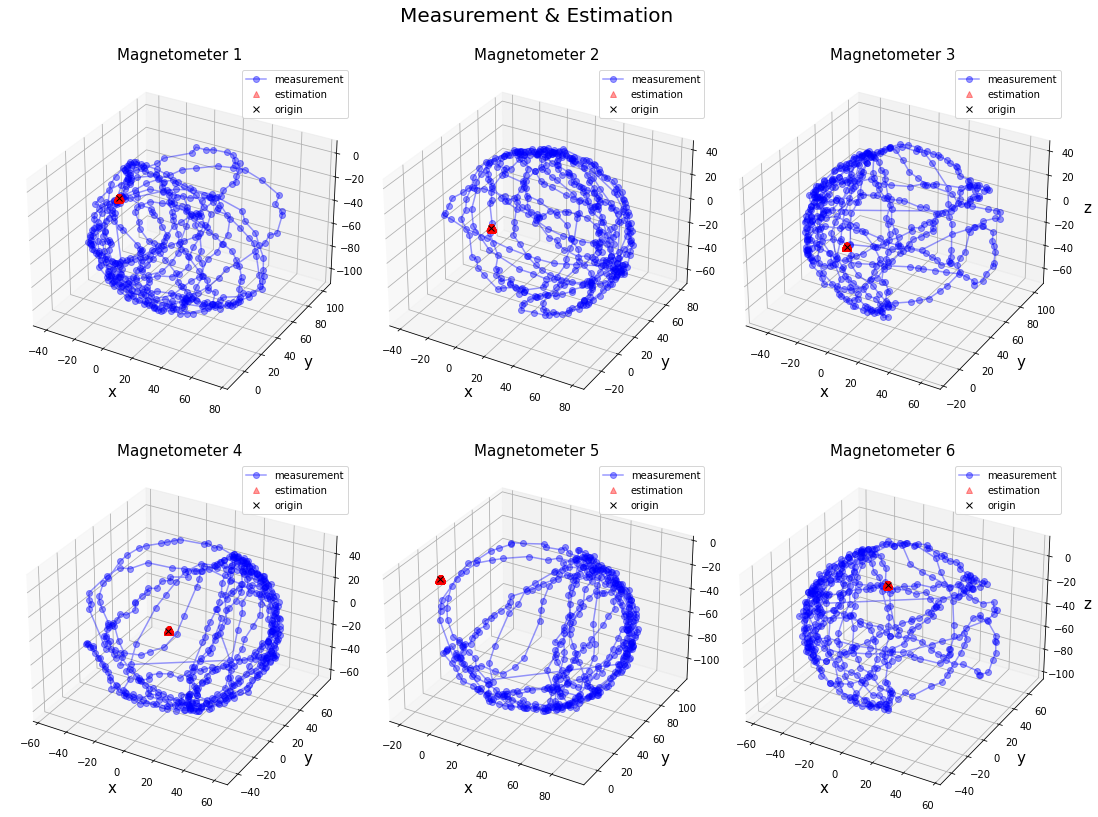

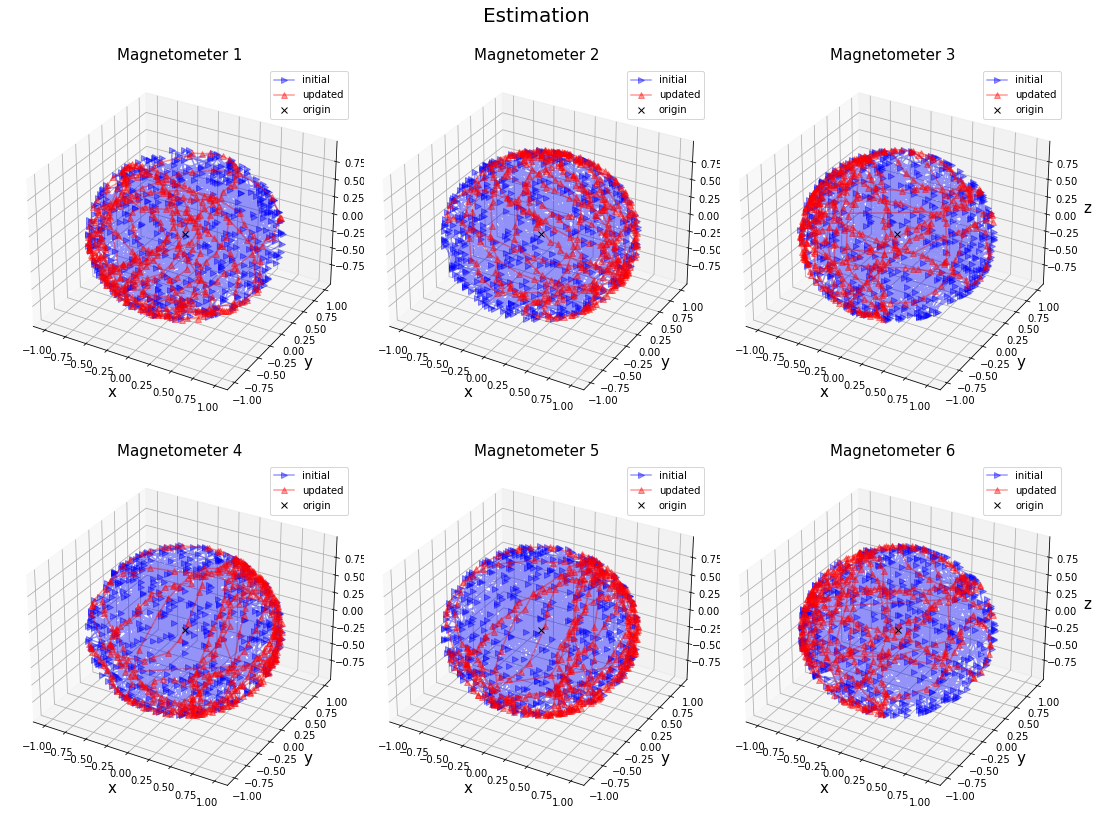

In [51]:

xs_updated_plot = [x.T / np.linalg.norm(x.T, axis=1).reshape(-1, 1) for x in xs]


fig, axs = visualize_estimates(M, xs_updated_plot)
plt.suptitle("Measurement & Estimation", fontsize=20) 
plt.tight_layout()
plt.show() 

fig2, axs2 = visualize_estimates_only(xs_updated_plot, xs_initial_plot)
plt.suptitle("Estimation", fontsize=20)
plt.tight_layout()
plt.show()

## Save All results

In [57]:
Ks_array = np.array(Ks)
bs_array = np.array(bs) 

for i in range(6): 
    save_dir = f"results/Magnetometor_{i+1}/"
    os.makedirs(save_dir, exist_ok=True)
    np.savetxt(save_dir + f"K{i+1}", Ks_array[i], delimiter=' ')
    np.savetxt(save_dir + f"b{i+1}", bs_array[i], delimiter=' ')
    np.savetxt(save_dir + f"x{i+1}", xs_updated_plot[i], delimiter=' ')
  

In [76]:
def loss_figure(losses):
  """
  Function that visualized each magnetometers loss by update step 

  input: measurement_data 
  return: (fig, axs) 
  """

  fig = plt.figure(figsize=(16, 8))
  # fig.suptitle("Measurements by each Magnetometer", fontsize=20)
  axs = []
  for loss in losses: 
      i = 0    
      ax = fig.add_subplot(2, 3, i+1)
      ax.set_title(f"Magnetometer {i+1}", fontsize=15)
      ax.semilogy(loss, label='cost')
      ax.set_xlabel('step', fontsize=15); ax.set_ylabel('cost', fontsize=15)
      ax.legend(); ax.grid();
      axs.append(ax)
      i += 1
  return (fig, axs)

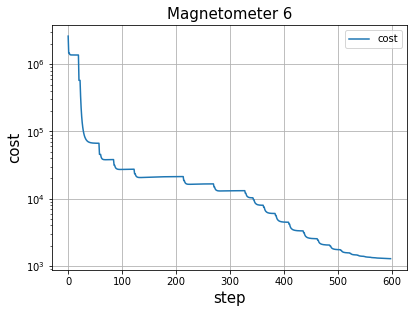

In [77]:

fig, axs = loss_figure(losses)
axs[0].set_title(f"Magnetometer 6", fontsize=15)
plt.tight_layout()
plt.show()